In [70]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

# Data preparation

Lets create a dataset following the linear regression formula:
$y = weight \times X + bias $


In [71]:
# Lets begin with declaring the known values for parameters
w = 0.7
b = 0.3 
# Lets create a simple linear model
x = torch.arange(0,1,0.02, dtype=torch.float)
print(f"shape={x.shape}")

# We got a vector of 50 elements. Lets reshape it so it can treat
# the elements as 50 samples of 1 feature
X = x.reshape(-1,1)
print(f"shape={X.shape}")

# Lets create the output of the model
Y = w*X + b
print(f"shape={Y.shape}")

shape=torch.Size([50])
shape=torch.Size([50, 1])
shape=torch.Size([50, 1])


In [72]:
# now lets make a split of the data into training and testing using 80/20 proportion
train_len = int(0.8 * len(X))

X_train = X[:train_len]
X_test = X[train_len:]
Y_train = Y[:train_len]
Y_test = Y[train_len:]

print(f"X_train.shape={X_train.shape}, X_test.shape={X_test.shape}")
print(f"Y_train.shape={Y_train.shape}, Y_test.shape={Y_test.shape}")


X_train.shape=torch.Size([40, 1]), X_test.shape=torch.Size([10, 1])
Y_train.shape=torch.Size([40, 1]), Y_test.shape=torch.Size([10, 1])


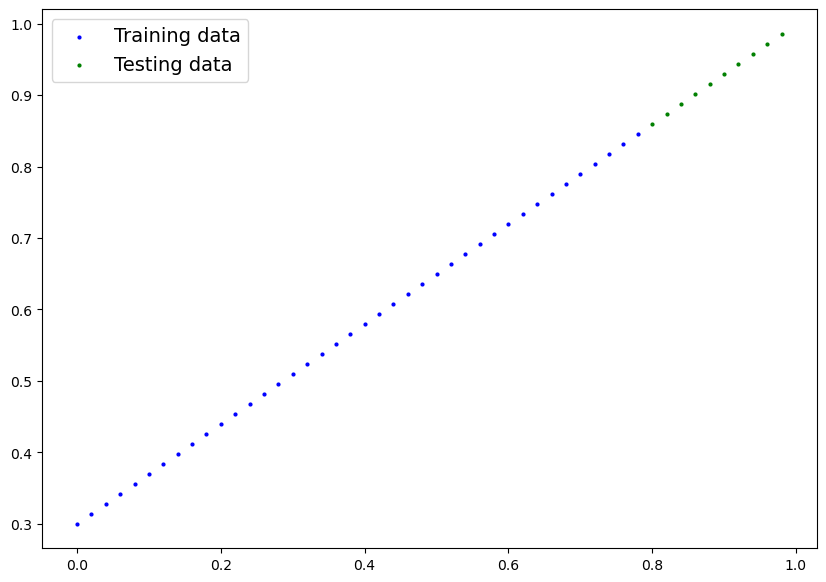

In [73]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions()

# Building a pytorch model

In [74]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1),
            requires_grad=True
        )

        self.bias = nn.Parameter(
            torch.randn(1),
            requires_grad=True
        )
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights*X + self.bias
    
lr_model = LinearRegression()
lr_model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

# Loss Function and optimizer

In [75]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

# Training loop

In [76]:
# set the seed 
torch.manual_seed(42)
# Set the number of epochs
epochs = 300 

# record optimization metrics
train_losses = []
test_losses = []
epoch_count = []

# perform the loop
for epoch in range(epochs):

    # === Training ===
    # Set the train mode
    lr_model.train()

    # 1. Forward pass 
    y_pred = lr_model(X_train)

    # 2. Calulate the loss
    train_loss = loss_fn(y_pred, Y_train)

    # 3. set gradients to zero
    optimizer.zero_grad()

    # 4. Backward pass (back propagation on the loss)
    train_loss.backward()

    # 5. Optimize
    optimizer.step()

    # === Test ===
    # Set the model in evaluation mode
    lr_model.eval()

    # set the context manager in inference mode
    with torch.inference_mode():
        # 1. Foward pass
        y_test_pred = lr_model(X_test)
        # 2. Calculate the loss 
        test_loss = loss_fn(y_test_pred, Y_test)

        # Print optimization metrics
    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        print(f"Epoch: {epoch} | Train loss: {train_loss} \ Test loss: {test_loss}")



        


Epoch: 0 | Train loss: 0.25122663378715515 \ Test loss: 0.470524400472641
Epoch: 20 | Train loss: 0.09095562994480133 \ Test loss: 0.2517372965812683
Epoch: 40 | Train loss: 0.06757690757513046 \ Test loss: 0.17111757397651672
Epoch: 60 | Train loss: 0.05999922752380371 \ Test loss: 0.14298436045646667
Epoch: 80 | Train loss: 0.05305762216448784 \ Test loss: 0.12300487607717514
Epoch: 100 | Train loss: 0.04619281366467476 \ Test loss: 0.10714666545391083
Epoch: 120 | Train loss: 0.03932538628578186 \ Test loss: 0.09128846973180771
Epoch: 140 | Train loss: 0.032451897859573364 \ Test loss: 0.07543028146028519
Epoch: 160 | Train loss: 0.02558557130396366 \ Test loss: 0.058885179460048676
Epoch: 180 | Train loss: 0.018720759078860283 \ Test loss: 0.04302697628736496
Epoch: 200 | Train loss: 0.011848028749227524 \ Test loss: 0.02716878056526184
Epoch: 220 | Train loss: 0.00497832614928484 \ Test loss: 0.010623705573379993
Epoch: 240 | Train loss: 0.004330189432948828 \ Test loss: 0.0044424

# Make predictions


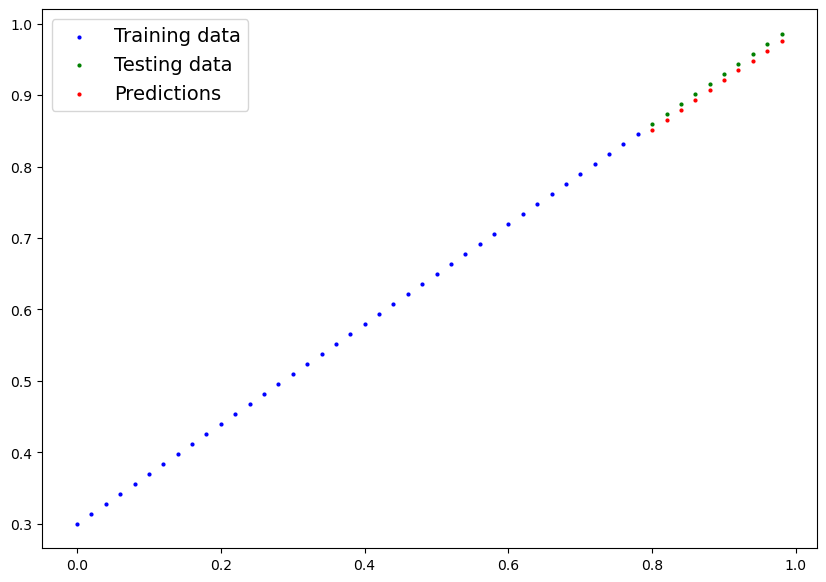

In [77]:
lr_model.eval()

with torch.inference_mode():
    y_pred = lr_model(X_test)

plot_predictions(predictions=y_pred)

# Save and reload the model

In [78]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True)
MODEL_NAME = "practice01_linear_regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model will be saved to {MODEL_SAVE_PATH}")
torch.save(
    lr_model.state_dict(),
    MODEL_SAVE_PATH
)


Model will be saved to models/practice01_linear_regression.pth


In [79]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(
    torch.load(MODEL_SAVE_PATH)
)

<All keys matched successfully>

# Confirm predictions from loaded model are correct

In [81]:
loaded_model.eval()
with torch.inference_mode():
    y_pred_from_loaded_model = loaded_model(X_test)

y_pred == y_pred_from_loaded_model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])